---
# ***Argentina Programa 4.0 - Programación Avanzada con Python***
---

## **Módulo 6**: Librería Pandas - DataFrames

### ***Universidad Nacional de Chilecito***

---


Representa una estructura de datos **tabular** que contiene una colección de columnas, cada una de las cuales tiene un tipo de datos determinado (number, string, boolean, etc.).

Podemos pensar un objeto `DataFrame` como un diccionario de `Series` "alineadas" (que comparten el mismo índice).

Una instancia de DataFrame tiene **índices de columnas y de filas**.  




### `DataFrame` como un diccionario de `Series` "alineadas"

Un `DataFrame` es un tipo de datos análogo a `Series` en dos dimensiones.

Como ejemplo, generemos un DataFrame con datos de área y población para distintos estados combinando dos series.

1) Generemos un objeto `Series` con el área de algunos estados a partir de un diccionario:

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

2) Generemos un objeto `Series` con la población de algunos estados a partir de listas:

In [ ]:
states_list = ['Illinois','Texas','New York', 'Florida', 'California']
states_pop = [12882135, 26448193, 19651127, 19552860, 38332521]
population = pd.Series(states_pop, index= states_list)
population

Generamos un objeto `DataFrame` a partir de los dos objetos `Series` generados en los puntos anteriores:

In [ ]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

Al igual que Series, un DataFrame posee un atributo index:

In [ ]:
states.index

Además, tiene un atributo columns, que es un objeto de tipo Index conteniendo las etiquetas de columnas:

In [ ]:
states.columns

Pueden observar que tanto los nombres de filas como los nombres de columnas son objetos del tipo `Index`.

### DataFrame como un diccionario especializado

De forma similar, podemos pensar auna instancia de `DataFrame` como un diccionario:
    
* Un diccionario mapea una key con un valor
* Un `DataFrame` mapea un nombre de columna con una `Series` de datos.
    
Por ejemplo, pedir el atributo `area` del `DataFrame` `states` devuelve una instancia de `Series`.


In [ ]:
states['area']

In [ ]:
states.area

In [ ]:
print(type(states['area']))
print(type(states.area))

In [ ]:
states['area'] is states.area

In [ ]:
states['area'] == states.area

¿Qué diferencia hay entre == y is ?


<a id="section_constructor"></a>
## Constructor

#### Documentación
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html


<a id="section_constructor_from_series"></a>
### Desde una instancia de `Series`:

In [ ]:
pd.DataFrame(population, columns=['population'])

<a id="section_constructor_from_dicts"></a>
### Desde una lista de `dicts`

In [ ]:
dict_0 = {'a': 0, 'b': 0}
dict_1 = {'a': 1, 'b': 2}
dict_2 = {'a': 2, 'b': 4}

data = [dict_0, dict_1, dict_2]

pd.DataFrame(data)

Otra forma de construir lo mismo, usando listas por comprensión:

In [ ]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]

print(data)

pd.DataFrame(data)

Incluso si alguna key no tiene un valor asociado en el diccionario, Pandas completa con NaN el valor:

In [ ]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

<a id="section_constructor_from_2darray"></a>
### Desde un array `Numpy` de dos dimensiones:



In [ ]:
array_2d = np.random.rand(3, 2)
# veamos qué hay en la variable array_2d:
print(array_2d)

columns_names = ['foo', 'bar']
rows_names = ['a', 'b', 'c']

pd.DataFrame(array_2d, columns=columns_names, index=rows_names)


<a id="section_selection"></a>
## Selección de datos en `DataFrame`

Vamos a ver ahora distintas formas de seleccionar elementos en instancias de `DataFrame`

Comencemos creando el objeto `data`:

In [ ]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

<a id="section_selection_head_tail"></a>
### Primeros n elementos, últimos n elementos

Puede accederse a los primeros n elementos del DataFrame con el método df.head(n). Del mismo modo, puede aplicarse el método df.tail(n) para acceder a los últimos elementos del DataFrame:

In [ ]:
data.head(2)

In [ ]:
data.tail(3)

<a id="section_selection_sample"></a>
### Muestra aleatoria de n elementos

Con el método df.sample(n) obtenemos una muestra aleatória de n elementos:

In [ ]:
data.sample(2)

<a id="section_selection_col"></a>
### Columnas
    
Podemos acceder a las Series individuales que forman las columnas del DataFrame de forma análoga a un diccionario de varias formas:

* Vía el nombre de la columna:

In [ ]:
data['area']

* Como atributo:

In [ ]:
data.area

Ambas formas son equivalentes:

In [ ]:
data['area'] is data.area

`values` devuelve los valores de todos los elementos que conforman el objeto `DataFrame` como un objeto `numpy.ndarray`:

In [ ]:
data.values

<a id="section_selection_index"></a>
### Indexación
    
Vamos a indexar un objeto `DataFrame` con dos índices, uno para las filas y el otro para las columnas.
    
Las formas de indexar que vimos en arrays y es series sirven también para dataframes.

Recordemos cuáles son:
    

####  loc iloc

In [ ]:
data.iloc[:3, :2]

In [ ]:
data.loc[:'Illinois', :'pop']

####  Boolean masking

In [ ]:
data.loc[data.area > 423000, :]

####  Fancy indexing

In [ ]:
data.loc[:, ['pop', 'area']]

####  Combinando boolean masking y fancy indexing

In [ ]:
data.loc[data.area > 423000, ['pop', 'area']]

#### Algunas convenciones adicionales para indexar

Hasta ahora vimos cómo indexar un objeto `DataFrame` con un índice sobre filas y otro sobre columnas.

Podemos tambien indexarlos usando sólo un índice que se interpreta según el detalle que vemos a continuación.


En general, "fancy indexing" refiere a columnas, mientras que "slicing" refiere a filas:

In [ ]:
data[['area', 'area']]

In [ ]:
data['Florida':'Illinois']

Slicing puede referir filas por posición, en lugar de índices:

In [ ]:
data[1:3]

Boolean masking se interpretada por defecto sobre filas:

In [ ]:
data[data.area > 423000]

<a id="section_modify"></a>
### Moficación de valores

Podemos crear una nueva columna en un objeto DataFrame como el resultado de una operación sobre otros elementos del objeto:

In [ ]:
data['density'] = data['pop'] / data['area']
data

Cualquiera de las formas de indexar que vimos puede ser usada para asignar o modificar valores:

In [ ]:
data.iloc[0, 2] = 90
data

# Google Drive
---
Con ayuda del siguiente código podrás vincular tu cuenta de Google Drive.

Como recomendación te pedimos que crees una carpeta denominada como `CCDAA` dentro de tu carpeta principal de Drive.

Dentro de esa carpeta crea otra carpeta denominada `Data` en esa carpeta deberás subir siempre los archivos que necesites utilizar.

Con el siguiente comando podrás abrir el archivo que vamos a necesitar en ésta ocasión:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
pathCurso = '/content/drive/MyDrive/AP_UNdeC/Data/'

Mounted at /content/drive


# Exploración del dataset

En esta clase, vamos a trabajar con un dataset de review de vinos: `winemag-data-130k-v2.csv`.


* El dataset deberá estar dentro de la carpeta `Data`
* Lo podemos descargar en: https://www.kaggle.com/zynicide/wine-reviews/ (nos tenemos que registrar)

## Antes que nada, hablemos de Tipos de Variables

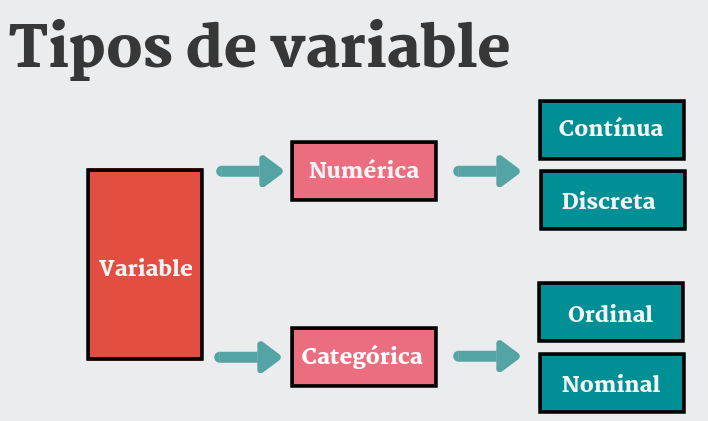

In [ ]:
ruta_archivo = pathCurso + 'winemag-data-130k-v2.csv'

In [ ]:
print(ruta_archivo)

/content/drive/MyDrive/CCDAA/Data/winemag-data-130k-v2.csv


In [ ]:
wine_reviews_df = pd.read_csv(ruta_archivo)
wine_reviews_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Vemos que la columna `Unnamed: 0`, es una columna con valores secuenciales, que por el momento podríamos quitar:

In [ ]:
del wine_reviews_df['Unnamed: 0']

In [ ]:
wine_reviews_df.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [ ]:
# Funcion analisis descriptivo basico base de datos:
def descriptivo(datos):
    print("Head")
    display(datos.head())
    print("-----------------------------------------------------------------")
    print("")

    print("Nombre columnas")
    display(datos.columns)
    print("-----------------------------------------------------------------")
    print("")

    print("Shape")
    display(datos.shape)
    print("-----------------------------------------------------------------")
    print("")

    print("Information")
    display(datos.info())
    print("-----------------------------------------------------------------")
    print("")

    print("Describe")
    display(datos.describe())
    print("-----------------------------------------------------------------")
    print("")

    print("Datos ausentes")
    display(datos.isna().sum())
    print("-----------------------------------------------------------------")
    print("")


Exploremos un poco el dataset.

Imprimimos las primeras 5 filas:

In [ ]:
descriptivo(wine_reviews_df)

Head


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


-----------------------------------------------------------------

Nombre columnas


Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

-----------------------------------------------------------------

Shape


(129971, 13)

-----------------------------------------------------------------

Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64

None

-----------------------------------------------------------------

Describe


,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


-----------------------------------------------------------------

Datos ausentes


country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

-----------------------------------------------------------------



In [ ]:
wine_reviews_df.head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
display(wine_reviews_df.head(5))

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Busco cual es el que tiene el valor maximo en puntos.

In [ ]:
# dir(wine_reviews_df)

In [ ]:
max_point = wine_reviews_df["points"].max()
print(max_point)
print(wine_reviews_df["points"].idxmax())

100
345


In [ ]:
# display(wine_reviews_df.iloc[345])
display(wine_reviews_df.iloc[wine_reviews_df["points"].idxmax()])

country                                                          Australia
description              This wine contains some material over 100 year...
designation                                                           Rare
points                                                                 100
price                                                                350.0
province                                                          Victoria
region_1                                                        Rutherglen
region_2                                                               NaN
taster_name                                                 Joe Czerwinski
taster_twitter_handle                                               @JoeCz
title                    Chambers Rosewood Vineyards NV Rare Muscat (Ru...
variety                                                             Muscat
winery                                         Chambers Rosewood Vineyards
Name: 345, dtype: object

In [ ]:
# Podemos mesclar ambas formas de filtrar los datos en .loc
display(wine_reviews_df.loc[wine_reviews_df["points"].idxmax(),"description"])

"This wine contains some material over 100 years old, but shows no signs of fragility. Instead, it's concentrated through age and should hold in the bottle indefinitely. It's dark coffee-brown in color, with delectable aromas of rancio, dried fig, molasses and black tea, yet despite enormous concentration avoids excessive weight. And it's amazingly complex and fresh on the nearly endless finish."

Busco cual es el que tiene el valor mínimo en puntos.

In [ ]:
display(wine_reviews_df.iloc[wine_reviews_df["points"].idxmin()])

country                                                              Chile
description              Aromas of pumpkin, squash and corn chips are s...
designation                                                   Gran Reserva
points                                                                  80
price                                                                 19.0
province                                                      Leyda Valley
region_1                                                               NaN
region_2                                                               NaN
taster_name                                              Michael Schachner
taster_twitter_handle                                          @wineschach
title                    Viña Tarapacá 2015 Gran Reserva Chardonnay (Le...
variety                                                         Chardonnay
winery                                                       Viña Tarapacá
Name: 344, dtype: object

Cuantos maximos hay

In [ ]:
# wine_reviews_df['points'] == max_point

In [ ]:
maximos = wine_reviews_df[wine_reviews_df['points'] == max_point]
print(len(maximos))
maximos[["country","designation","price"]]

19


,country,designation,price
345,Australia,Rare,350.0
7335,Italy,Occhio di Pernice,210.0
36528,France,Brut,259.0
39286,Italy,Masseto,460.0
42197,Portugal,Barca-Velha,450.0
45781,Italy,Riserva,550.0
45798,US,NaN,200.0
58352,France,NaN,150.0
89728,France,Cristal Vintage Brut,250.0
89729,France,Le Mesnil Blanc de Blancs Brut,617.0


¿ Cuántas filas tiene el dataset? ¿ Y cuántas columnas ?

Esta pregunta, podemos responderla utilizando `shape`



In [ ]:
wine_reviews_df.shape

(129971, 13)

¿ Cuántos valores faltantes tiene el dataset en cada columna ?

In [ ]:
display(wine_reviews_df.isna().sum())

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [ ]:
# wine_reviews_df.shape[0]

In [ ]:
# En porcentaje de la cantidad de datos
display((wine_reviews_df.isna().sum()/wine_reviews_df.shape[0])*100)

country                   0.048472
description               0.000000
designation              28.825661
points                    0.000000
price                     6.921544
province                  0.048472
region_1                 16.347493
region_2                 61.136715
taster_name              20.192197
taster_twitter_handle    24.015357
title                     0.000000
variety                   0.000769
winery                    0.000000
dtype: float64

Ahora, ¿Qué hacemos con los faltantes?

Pandas tiene el método .fillna() para imputar valores faltantes y el método .dropna() para eliminar filas con valores faltantes.

Veamos un poco de documentación:

In [ ]:
help(pd.DataFrame.dropna)

Help on function dropna in module pandas.core.frame:

dropna(self, *, axis: 'Axis' = 0, how: 'str | NoDefault' = <no_default>, thresh: 'int | NoDefault' = <no_default>, subset: 'IndexLabel' = None, inplace: 'bool' = False) -> 'DataFrame | None'
    Remove missing values.
    
    See the :ref:`User Guide <missing_data>` for more on which values are
    considered missing, and how to work with missing data.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Determine if rows or columns which contain missing values are
        removed.
    
        * 0, or 'index' : Drop rows which contain missing values.
        * 1, or 'columns' : Drop columns which contain missing value.
    
        .. versionchanged:: 1.0.0
    
           Pass tuple or list to drop on multiple axes.
           Only a single axis is allowed.
    
    how : {'any', 'all'}, default 'any'
        Determine if row or column is removed from DataFrame, when we have
        at l

In [ ]:
help(pd.DataFrame.fillna)

Help on function fillna in module pandas.core.frame:

fillna(self, value: 'Hashable | Mapping | Series | DataFrame' = None, *, method: 'FillnaOptions | None' = None, axis: 'Axis | None' = None, inplace: 'bool' = False, limit: 'int | None' = None, downcast: 'dict | None' = None) -> 'DataFrame | None'
    Fill NA/NaN values using the specified method.
    
    Parameters
    ----------
    value : scalar, dict, Series, or DataFrame
        Value to use to fill holes (e.g. 0), alternately a
        dict/Series/DataFrame of values specifying which value to use for
        each index (for a Series) or column (for a DataFrame).  Values not
        in the dict/Series/DataFrame will not be filled. This value cannot
        be a list.
    method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
        Method to use for filling holes in reindexed Series
        pad / ffill: propagate last valid observation forward to next valid
        backfill / bfill: use next valid observation to f

Ahora, para no modificar nuestro dataset original, lo vamos a clonar con `copy()`

In [ ]:
# Clono ahora si modifico df no se modifica el original
df = wine_reviews_df.copy(deep=True)

Ahora vamos a trabajar sobre df.

In [ ]:
df.isna().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


Vemos que las columnas que tienen datos faltantes son designation, price, region_1, region_2, entre otras.

Por ahora, como solo estamos aprendiendo Pandas, no vamos a explorar mucho los datos para tomar decisiones. Simplemente vamos a aprender como se usa pandas. En próximas clases vamos a empezar a explorar los datos con mas detalle para tomar buenas decisiones.

Empecemos con el método fillna:

Vamos a imputar los valores faltantes de la columna "price" con la media de la columna.

In [ ]:
mean_price = df['price'].mean()
df['price'] = df['price'].fillna(mean_price)
print(mean_price)

35.363389129985535


Verificamos que no haya más nulos

In [ ]:
df.isna().sum()

country                     63
description                  0
designation              37465
points                       0
price                        0
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

Vemos que ahora hay 0 null values en la columna price

Ahora, completemos las columnas "designation", "region_1" y "region_2" con el valor por defecto: "dato faltante".

Podemos hacerlo pasandole un diccionario como parametro:

In [ ]:
default_value = "dato faltante"
df = df.fillna(value={'designation': default_value, "region_1": default_value, "region_2": default_value})

Rellenamos con dato faltante la variable designation, region 1 y region 2

In [ ]:
df.isna().sum()

country                     63
description                  0
designation                  0
points                       0
price                        0
province                    63
region_1                     0
region_2                     0
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

Ahora nos queda la columna country y las demás. En este caso, lo que vamos a hacer es descartar las filas que tengan valores faltantes en esta columna.
Para esto, vamos a usar el método dropna() y vamos a pasarle el parámetro axis=0

Veamos cuantas filas tiene el dataset antes de borrar nulos:

In [ ]:
df.shape[0]

129971

Borramos nulos:

In [ ]:
df = df.dropna(axis=0)

Y ahora debería haber varias filas menos:

In [ ]:
wine_reviews_df.shape[0]

129971

In [ ]:
df.shape[0]

98695

In [ ]:
wine_reviews_df.shape[0]-df.shape[0]

31276

## Filtro por máscara

Vimos que en numpy podemos utilizar filtros. En pandas también podemos hacerlo y es algo que vamos utilizar mucho asique es importante aprender a usarlo bien!

Los filtros se utilizan igual que en numpy.

Seleccionemos todas las filas en las que country sea = 'US'

In [ ]:
# df['country'] == 'US'

In [ ]:
mask_country = df['country'] == 'US'
print(mask_country)

0         False
1         False
2          True
4          True
5         False
          ...  
129965    False
129967     True
129968    False
129969    False
129970    False
Name: country, Length: 98695, dtype: bool


In [ ]:
print(df[mask_country].shape)
df[mask_country].head(5)

(34741, 13)


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
2,US,"Tart and snappy, the flavors of lime flesh and...",dato faltante,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,US,"Slightly reduced, this wine offers a chalky, t...",dato faltante,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
14,US,Building on 150 years and six generations of w...,dato faltante,87,12.0,California,Central Coast,Central Coast,Matt Kettmann,@mattkettmann,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou


## Funciones de Dataframes

- value_counts
- unique
- nunique
- max
- min
- sort_values

Responder las siguientes preguntas utilizando lo que sabemos de pandas + lo que investigamos de las funciones de arriba (con la menor cantidad de funciones posibles):

a) ¿ Qúe valores distintos (únicos) hay en la columna country ?

b) ¿ Cuántos valores distintos hay en la columna country ?

c) ¿ Con qué frecuencia (cuantas veces) aparece cada uno de los paises ?

d) ¿ Cuál es el valor máximo de la columna price ?

e) ¿ Cuál es el valor mínimo de la columna price ?

f) ¿ Cuál es el vino más caro ?

g) ¿ Cuántos vinos tienen un precio por encima de la media ?


a) ¿ Qúe valores distintos (únicos) hay en la columna country ?

In [ ]:
print(df['country'].unique())

['Italy' 'Portugal' 'US' 'Spain' 'France' 'Argentina' 'Chile' 'Australia'
 'Austria' 'South Africa' 'New Zealand' 'Israel' 'Hungary' 'Greece'
 'Canada' 'Mexico' 'Romania' 'Germany' 'Turkey' 'Luxembourg' 'Croatia'
 'Georgia' 'Uruguay' 'England' 'Lebanon' 'Serbia' 'Brazil' 'Slovenia'
 'Moldova' 'Morocco' 'Czech Republic' 'Peru' 'India' 'Bulgaria' 'Cyprus'
 'Armenia' 'Switzerland' 'Ukraine' 'Macedonia' 'Bosnia and Herzegovina'
 'China' 'Egypt']


b) ¿ Cuántos valores distintos hay en la columna country ?

In [ ]:
print(len(df['country'].unique()))
print(df['country'].nunique())

42
42


c) ¿ Con qué frecuencia (cuantas veces) aparece cada uno de los paises ?

In [ ]:
print(df['country'].value_counts())

US                        34741
France                    21828
Italy                     11042
Spain                      6581
Portugal                   5686
Chile                      4361
Argentina                  3797
Austria                    3337
Australia                  2037
South Africa               1328
New Zealand                1311
Israel                      500
Greece                      466
Germany                     375
Canada                      241
Bulgaria                    122
Hungary                     113
Uruguay                     109
Turkey                       85
Romania                      79
England                      74
Mexico                       65
Georgia                      64
Slovenia                     61
Moldova                      58
Brazil                       52
Croatia                      34
Morocco                      26
Lebanon                      25
Peru                         16
Serbia                       12
Ukraine 

In [ ]:
print(df['country'].value_counts("%")*100)

US                        35.200365
France                    22.116622
Italy                     11.188003
Spain                      6.668018
Portugal                   5.761183
Chile                      4.418664
Argentina                  3.847206
Austria                    3.381124
Australia                  2.063934
South Africa               1.345560
New Zealand                1.328335
Israel                     0.506611
Greece                     0.472162
Germany                    0.379958
Canada                     0.244187
Bulgaria                   0.123613
Hungary                    0.114494
Uruguay                    0.110441
Turkey                     0.086124
Romania                    0.080045
England                    0.074978
Mexico                     0.065859
Georgia                    0.064846
Slovenia                   0.061807
Moldova                    0.058767
Brazil                     0.052688
Croatia                    0.034450
Morocco                    0

d) ¿ Cuál es el valor máximo de la columna price ?

In [ ]:
df["price"].max()

3300.0

e) ¿ Cuál es el valor mínimo de la columna price ?

In [ ]:
df["price"].min()

4.0

f) ¿ Cuál es el vino más caro ?

In [ ]:
# Cuantos maximos hay
# caro = df[df["price"]==df["price"].max()]
# display(caro)
# o
df[df["price"]==df["price"].max()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
80290,France,This ripe wine shows plenty of blackberry frui...,dato faltante,88,3300.0,Bordeaux,Médoc,dato faltante,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet


g) ¿ Cuántos vinos tienen un precio por encima de la media ?

In [ ]:
# df["price"]>mean_price

In [ ]:
mask_avg_price = df["price"]>mean_price
mayormedia = df[mask_avg_price]
print(len(mayormedia))
print(mayormedia.shape[0])
display(mayormedia.head())

29447
29447


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath
59,US,"Aromas of cranberry, barrel spice and herb are...",dato faltante,86,55.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Mellisoni 2014 Malbec (Columbia Valley (WA)),Malbec,Mellisoni
60,US,"Syrupy and dense, this wine is jammy in plum a...",Estate,86,100.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Okapi 2013 Estate Cabernet Sauvignon (Napa Val...,Cabernet Sauvignon,Okapi


**Ejercicio** cuales son los vinos mas baratos?

In [ ]:
# Codigo
print(df[df["price"]==df["price"].min()].shape[0])
df[df["price"]==df["price"].min()]

7


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1987,Spain,Berry and cherry aromas are surprisingly sturd...,Flirty Bird,85,4.0,Central Spain,Vino de la Tierra de Castilla,dato faltante,Michael Schachner,@wineschach,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,Felix Solis
20484,US,"Fruity, soft and rather sweet, this wine smell...",dato faltante,85,4.0,California,Clarksburg,Central Valley,Jim Gordon,@gordone_cellars,Dancing Coyote 2015 White (Clarksburg),White Blend,Dancing Coyote
29553,Argentina,"Crimson in color but also translucent, with a ...",Red,84,4.0,Mendoza Province,Mendoza,dato faltante,Michael Schachner,@wineschach,Broke Ass 2009 Red Malbec-Syrah (Mendoza),Malbec-Syrah,Broke Ass
59507,US,"Sweet and fruity, this canned wine feels soft ...",Unoaked,83,4.0,California,California,California Other,Jim Gordon,@gordone_cellars,Pam's Cuties NV Unoaked Chardonnay (California),Chardonnay,Pam's Cuties
61768,Spain,This opens with standard cherry and berry arom...,dato faltante,84,4.0,Levante,Yecla,dato faltante,Michael Schachner,@wineschach,Terrenal 2010 Cabernet Sauvignon (Yecla),Cabernet Sauvignon,Terrenal
112919,Spain,"Nice on the nose, this has a leafy note and a ...",Estate Bottled,84,4.0,Levante,Yecla,dato faltante,Michael Schachner,@wineschach,Terrenal 2010 Estate Bottled Tempranillo (Yecla),Tempranillo,Terrenal
117303,Spain,"Tropical fruit and citrus aromas aren't bad, b...",Flirty Bird,82,4.0,Central Spain,Vino de la Tierra de Castilla,dato faltante,Michael Schachner,@wineschach,Felix Solis 2012 Flirty Bird White (Vino de la...,White Blend,Felix Solis


**Haz doble click para ver la respuesta**

<!--
df[df["price"]==df["price"].min()]
 -->

# Group by


La función group by de pandas, nos permite agrupar dataframes a partir de una o más columnas y mediante funciones de agregación obtener insights de cada grupo.

Veamos ejemplos:

In [ ]:
group_by_country = df.groupby('country')
display(group_by_country)

Vemos que groupby nos devuelve un objeto pandas.core.groupby.generic.DataFrameGroupBy.

Sobre este objeto, podemos aplicar directamente funciones de agregación como .count(), .sum(), .mean(), etcétera:

In [ ]:
group_by_country.count().head()

,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,description_len,float_point,suma_price_points
country,,,,,,,,,,,,,,,
Argentina,3797,3797,3797,3797,3797,3797,3797,3797,3797,3797,3797,3797,3797,3797,3797
Armenia,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Australia,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037
Austria,3337,3337,3337,3337,3337,3337,3337,3337,3337,3337,3337,3337,3337,3337,3337
Bosnia and Herzegovina,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
group_by_country.mean().head()

<ipython-input-151-50bc5ceb31d5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_by_country.mean().head()


,points,price,description_len,float_point,suma_price_points
country,,,,,
Argentina,86.707664,24.578875,250.542007,86.707664,111.286539
Armenia,87.500000,14.500000,214.500000,87.500000,102.000000
Australia,88.792342,37.460924,254.833088,88.792342,126.253265
Austria,90.112376,31.531738,249.644591,90.112376,121.644115
Bosnia and Herzegovina,88.000000,12.000000,173.000000,88.000000,100.000000


¿ Por qué cuando aplicamos la función mean solo nos trae 3 columnas y el indice ?

También podemos agrupar por múltiples columnas:

In [ ]:
group_by_country_prov = df.groupby(['country', 'province'])
group_by_country_prov.mean().head()

<ipython-input-152-99cbfd5effee>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_by_country_prov.mean().head()


points      price  description_len  \
country   province                                                  
Argentina Mendoza Province  86.823674  25.107577       251.630481   
          Other             86.001866  21.362277       243.919776   
Armenia   Armenia           87.500000  14.500000       214.500000   
Australia Australia Other   85.530612  13.659543       208.030612   
          New South Wales   87.802632  26.328947       238.394737   

                            float_point  suma_price_points  
country   province                                          
Argentina Mendoza Province    86.823674         111.931251  
          Other               86.001866         107.364142  
Armenia   Armenia             87.500000         102.000000  
Australia Australia Other     85.530612          99.190156  
          New South Wales     87.802632         114.131579

Y si no queremos que las variables por las que agrupamos se conviertan en indices y sean una columna más, podemos especificarlo en la función:

In [ ]:
group_by_country_prov = df.groupby(['country', 'province'], as_index=False)
group_by_country_prov.mean().head()

<ipython-input-153-219344b2a5f4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_by_country_prov.mean().head()


,country,province,points,price,description_len,float_point,suma_price_points
0,Argentina,Mendoza Province,86.823674,25.107577,251.630481,86.823674,111.931251
1,Argentina,Other,86.001866,21.362277,243.919776,86.001866,107.364142
2,Armenia,Armenia,87.500000,14.500000,214.500000,87.500000,102.000000
3,Australia,Australia Other,85.530612,13.659543,208.030612,85.530612,99.190156
4,Australia,New South Wales,87.802632,26.328947,238.394737,87.802632,114.131579


Finalmente, también podemos aplicar distintas funciones de agregación a cada columna.


1. Agrupar el dataset por pais.

2. Obtener una columna que tenga el precio medio por país y otra que contenga la sumatoria de puntos. (.mean() y .sum() ).

In [ ]:
group_by_country_prov = df.groupby(['country'], as_index=False).agg({'price': ['mean'],'points': ['count']})

group_by_country_prov.columns = ["Country",'Price mean', 'Points count']
display(group_by_country_prov.head())

,Country,Price mean,Points count
0,Argentina,24.578875,3797
1,Armenia,14.500000,2
2,Australia,37.460924,2037
3,Austria,31.531738,3337
4,Bosnia and Herzegovina,12.000000,1


# Sort values

Para ordenar un dataframe de pandas, podemos utilizar la función sort_values()


Ordenar el dataset por "points" de manera descendente.

In [ ]:
print("Tabla Ascendente por Points")
display(group_by_country_prov.sort_values(by=['Points count'], ascending=[True]).head())
print("")
print("--------------------------------")
print("")
print("Tabla Descendente por Points")
display(group_by_country_prov.sort_values(by=['Points count'], ascending=[False]).head())

Tabla Ascendente por Points


,Country,Price mean,Points count
4,Bosnia and Herzegovina,12.000000,1
13,Egypt,35.363389,1
9,China,18.000000,1
1,Armenia,14.500000,2
24,Luxembourg,23.333333,6



--------------------------------

Tabla Descendente por Points


,Country,Price mean,Points count
39,US,37.188448,34741
15,France,40.041812,21828
22,Italy,41.086640,11042
36,Spain,28.419870,6581
31,Portugal,27.423765,5686


# Manejo de Fechas

Vamos a trabajar con el dataset `certificados-personas-por-fecha-ingreso-provincia-localidad.csv` que se puede descargar desde este [link](https://www.datos.gob.ar/dataset/turismo-certificado-unico-habilitante-para-circulacion-cuhc---verano/archivo/turismo_176dc4bc-7597-4e9b-850d-0d27bcbca8d0) .

Leer el dataset con pandas: Tener en cuenta que hay una columna "fecha_ingreso". ¿ Cómo podemos especificarle a pandas que lea esa columna como una fecha ?  

- ¿ Cómo podemos acceder a el día/mes/año de una columna ?
- ¿ Cómo podemos acceder a la semana de el año de una fecha ?
- ¿ Cómo podemos acceder al día de la semana de una fecha ?

Podemos ver en la documentación de pandas, que esta lleno de atributos y funciones de las fechas que podemos utilizar. Por ejemplo, si queremos saber si una fecha corresponde a el primer día del mes: https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.is_month_start.html


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
pathCurso = '/content/drive/MyDrive/AP_UNdeC/Data/'

Con el siguiente comando podrás abrir el archivo que vamos a necesitar en ésta ocasión:

In [ ]:
# Importar pandas
import pandas as pd

ruta_archivo = pathCurso + 'certificados-personas-por-fecha-ingreso-provincia-localidad.csv'

In [ ]:
datos = pd.read_csv(ruta_archivo)
datos.head(5)

,fecha_ingreso,destino_provincia,destino_localidad,cantidad_certificados,cantidad_personas
0,2020-12-01,Buenos Aires,Adolfo Gonzáles Chaves,1,2.0
1,2020-12-01,Buenos Aires,Aguas Verdes,5,18.0
2,2020-12-01,Buenos Aires,Alberti,0,NaN
3,2020-12-01,Buenos Aires,Almirante Brown,0,NaN
4,2020-12-01,Buenos Aires,ARRECIFES,1,2.0


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170807 entries, 0 to 170806
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_ingreso          170807 non-null  object 
 1   destino_provincia      170807 non-null  object 
 2   destino_localidad      170807 non-null  object 
 3   cantidad_certificados  170807 non-null  int64  
 4   cantidad_personas      84914 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 6.5+ MB


In [ ]:
?pd.read_csv

In [ ]:
pd.to_datetime('2023-06-29')

Timestamp('2023-06-29 00:00:00')

In [ ]:
pd.to_datetime('23-06-29')

Timestamp('2029-06-23 00:00:00')

In [ ]:
pd.to_datetime('9-6-2023')

Timestamp('2023-09-06 00:00:00')

In [ ]:
?pd.to_datetime

In [ ]:
pd.to_datetime('9-6-2023',format='%d-%m-%Y')

Timestamp('2023-09-06 00:00:00')

In [ ]:
datos['fecha_ingreso_2']=pd.to_datetime(datos['fecha_ingreso'])

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170807 entries, 0 to 170806
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   fecha_ingreso          170807 non-null  object        
 1   destino_provincia      170807 non-null  object        
 2   destino_localidad      170807 non-null  object        
 3   cantidad_certificados  170807 non-null  int64         
 4   cantidad_personas      84914 non-null   float64       
 5   fecha_ingreso_2        170807 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 7.8+ MB


In [ ]:
datos.head()

,fecha_ingreso,destino_provincia,destino_localidad,cantidad_certificados,cantidad_personas,fecha_ingreso_2
0,2020-12-01,Buenos Aires,Adolfo Gonzáles Chaves,1,2.0,2020-12-01
1,2020-12-01,Buenos Aires,Aguas Verdes,5,18.0,2020-12-01
2,2020-12-01,Buenos Aires,Alberti,0,NaN,2020-12-01
3,2020-12-01,Buenos Aires,Almirante Brown,0,NaN,2020-12-01
4,2020-12-01,Buenos Aires,ARRECIFES,1,2.0,2020-12-01


In [ ]:
def funcion(x):
  return pd.to_datetime(x, format='%Y-%m-%d')

In [ ]:
datos2 = pd.read_csv(ruta_archivo,date_parser=funcion)#lambda x: pd.to_datetime(x)
datos2

,fecha_ingreso,destino_provincia,destino_localidad,cantidad_certificados,cantidad_personas
0,2020-12-01,Buenos Aires,Adolfo Gonzáles Chaves,1,2.0
1,2020-12-01,Buenos Aires,Aguas Verdes,5,18.0
2,2020-12-01,Buenos Aires,Alberti,0,NaN
3,2020-12-01,Buenos Aires,Almirante Brown,0,NaN
4,2020-12-01,Buenos Aires,ARRECIFES,1,2.0
...,...,...,...,...,...
170802,2021-03-01,Tucumán,Villa de Leales,0,NaN
170803,2021-03-01,Tucumán,Villa Quinteros,0,NaN
170804,2021-03-01,Tucumán,Yánima,0,NaN
170805,2021-03-01,Tucumán,Yerba Buena,8,13.0


In [ ]:
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170807 entries, 0 to 170806
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_ingreso          170807 non-null  object 
 1   destino_provincia      170807 non-null  object 
 2   destino_localidad      170807 non-null  object 
 3   cantidad_certificados  170807 non-null  int64  
 4   cantidad_personas      84914 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 6.5+ MB


In [ ]:
?pd.read_csv

In [ ]:
datos2 = pd.read_csv(ruta_archivo,parse_dates=['fecha_ingreso'],date_parser=lambda x: pd.to_datetime(x))#lambda x: pd.to_datetime(x)
datos2

,fecha_ingreso,destino_provincia,destino_localidad,cantidad_certificados,cantidad_personas
0,2020-12-01,Buenos Aires,Adolfo Gonzáles Chaves,1,2.0
1,2020-12-01,Buenos Aires,Aguas Verdes,5,18.0
2,2020-12-01,Buenos Aires,Alberti,0,NaN
3,2020-12-01,Buenos Aires,Almirante Brown,0,NaN
4,2020-12-01,Buenos Aires,ARRECIFES,1,2.0
...,...,...,...,...,...
170802,2021-03-01,Tucumán,Villa de Leales,0,NaN
170803,2021-03-01,Tucumán,Villa Quinteros,0,NaN
170804,2021-03-01,Tucumán,Yánima,0,NaN
170805,2021-03-01,Tucumán,Yerba Buena,8,13.0


In [ ]:
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170807 entries, 0 to 170806
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   fecha_ingreso          170807 non-null  datetime64[ns]
 1   destino_provincia      170807 non-null  object        
 2   destino_localidad      170807 non-null  object        
 3   cantidad_certificados  170807 non-null  int64         
 4   cantidad_personas      84914 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 6.5+ MB


In [ ]:
datos2 = pd.read_csv(ruta_archivo,date_parser=lambda x: pd.to_datetime(x), index_col="fecha_ingreso")
datos2

,destino_provincia,destino_localidad,cantidad_certificados,cantidad_personas
fecha_ingreso,,,,
2020-12-01,Buenos Aires,Adolfo Gonzáles Chaves,1,2.0
2020-12-01,Buenos Aires,Aguas Verdes,5,18.0
2020-12-01,Buenos Aires,Alberti,0,NaN
2020-12-01,Buenos Aires,Almirante Brown,0,NaN
2020-12-01,Buenos Aires,ARRECIFES,1,2.0
...,...,...,...,...
2021-03-01,Tucumán,Villa de Leales,0,NaN
2021-03-01,Tucumán,Villa Quinteros,0,NaN
2021-03-01,Tucumán,Yánima,0,NaN


In [ ]:
datos2.index

DatetimeIndex(['2020-12-01', '2020-12-01', '2020-12-01', '2020-12-01',
               '2020-12-01', '2020-12-01', '2020-12-01', '2020-12-01',
               '2020-12-01', '2020-12-01',
               ...
               '2021-03-01', '2021-03-01', '2021-03-01', '2021-03-01',
               '2021-03-01', '2021-03-01', '2021-03-01', '2021-03-01',
               '2021-03-01', '2021-03-01'],
              dtype='datetime64[ns]', name='fecha_ingreso', length=170807, freq=None)

In [ ]:
datos3 = pd.read_csv(ruta_archivo)
datos3['fecha_ingreso'] = pd.to_datetime(datos3['fecha_ingreso'],format='%Y-%m-%d')


# datos3['year'] = pd.DatetimeIndex(datos3['fecha_ingreso']).year
# Otra forma
datos3['year'] = datos3['fecha_ingreso'].dt.year
datos3['month'] = datos3['fecha_ingreso'].dt.month
datos3['day'] = datos3['fecha_ingreso'].dt.day
# datos3['day'] = pd.DatetimeIndex(datos3['fecha_ingreso']).day

In [ ]:
datos3.head(5)

,fecha_ingreso,destino_provincia,destino_localidad,cantidad_certificados,cantidad_personas,year,month,day
0,2020-12-01,Buenos Aires,Adolfo Gonzáles Chaves,1,2.0,2020,12,1
1,2020-12-01,Buenos Aires,Aguas Verdes,5,18.0,2020,12,1
2,2020-12-01,Buenos Aires,Alberti,0,NaN,2020,12,1
3,2020-12-01,Buenos Aires,Almirante Brown,0,NaN,2020,12,1
4,2020-12-01,Buenos Aires,ARRECIFES,1,2.0,2020,12,1


In [ ]:
# Chequeo es una fecha
datos3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170807 entries, 0 to 170806
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   fecha_ingreso          170807 non-null  datetime64[ns]
 1   destino_provincia      170807 non-null  object        
 2   destino_localidad      170807 non-null  object        
 3   cantidad_certificados  170807 non-null  int64         
 4   cantidad_personas      84914 non-null   float64       
 5   year                   170807 non-null  int64         
 6   month                  170807 non-null  int64         
 7   day                    170807 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 10.4+ MB


¿ Cómo podemos acceder a el día/mes/año de una columna ?

In [ ]:
datos2.head(5)

,destino_provincia,destino_localidad,cantidad_certificados,cantidad_personas
fecha_ingreso,,,,
2020-12-01,Buenos Aires,Adolfo Gonzáles Chaves,1,2.0
2020-12-01,Buenos Aires,Aguas Verdes,5,18.0
2020-12-01,Buenos Aires,Alberti,0,NaN
2020-12-01,Buenos Aires,Almirante Brown,0,NaN
2020-12-01,Buenos Aires,ARRECIFES,1,2.0


In [ ]:
#Pero sigamos con datos2
datos2.loc["2020-12-01"].head(5)

,destino_provincia,destino_localidad,cantidad_certificados,cantidad_personas
fecha_ingreso,,,,
2020-12-01,Buenos Aires,Adolfo Gonzáles Chaves,1,2.0
2020-12-01,Buenos Aires,Aguas Verdes,5,18.0
2020-12-01,Buenos Aires,Alberti,0,NaN
2020-12-01,Buenos Aires,Almirante Brown,0,NaN
2020-12-01,Buenos Aires,ARRECIFES,1,2.0


In [ ]:
#Pero sigamos con datos3
datos3.loc[datos3["fecha_ingreso"]=="2020-12-01"].head(5)

,fecha_ingreso,destino_provincia,destino_localidad,cantidad_certificados,cantidad_personas,year,month,day
0,2020-12-01,Buenos Aires,Adolfo Gonzáles Chaves,1,2.0,2020,12,1
1,2020-12-01,Buenos Aires,Aguas Verdes,5,18.0,2020,12,1
2,2020-12-01,Buenos Aires,Alberti,0,NaN,2020,12,1
3,2020-12-01,Buenos Aires,Almirante Brown,0,NaN,2020,12,1
4,2020-12-01,Buenos Aires,ARRECIFES,1,2.0,2020,12,1


¿Cómo podemos ver la semana?

In [ ]:
# datos["semana"]=pd.DatetimeIndex(datos['fecha_ingreso']).week
datos3["semana"]=datos3['fecha_ingreso'].dt.isocalendar().week
# El 0 es el lunes

In [ ]:
datos3

,fecha_ingreso,destino_provincia,destino_localidad,cantidad_certificados,cantidad_personas,year,month,day,semana
0,2020-12-01,Buenos Aires,Adolfo Gonzáles Chaves,1,2.0,2020,12,1,49
1,2020-12-01,Buenos Aires,Aguas Verdes,5,18.0,2020,12,1,49
2,2020-12-01,Buenos Aires,Alberti,0,NaN,2020,12,1,49
3,2020-12-01,Buenos Aires,Almirante Brown,0,NaN,2020,12,1,49
4,2020-12-01,Buenos Aires,ARRECIFES,1,2.0,2020,12,1,49
...,...,...,...,...,...,...,...,...,...
170802,2021-03-01,Tucumán,Villa de Leales,0,NaN,2021,3,1,9
170803,2021-03-01,Tucumán,Villa Quinteros,0,NaN,2021,3,1,9
170804,2021-03-01,Tucumán,Yánima,0,NaN,2021,3,1,9
170805,2021-03-01,Tucumán,Yerba Buena,8,13.0,2021,3,1,9


## Ejercitación

1) Como ver el día de la semana

In [ ]:
datos3.loc[100]

fecha_ingreso            2020-12-01 00:00:00
destino_provincia               Buenos Aires
destino_localidad             Nueva Atlantis
cantidad_certificados                     16
cantidad_personas                       39.0
year                                    2020
month                                     12
day                                        1
semana                                    49
Name: 100, dtype: object

In [ ]:
datos3["fecha_ingreso"][1].month

12

In [ ]:
# print(datos3["fecha_ingreso"])
import calendar
calendar.day_name[datos3["fecha_ingreso"][1].weekday()]

'Tuesday'

In [ ]:
# print(datos3["fecha_ingreso"])
import calendar
calendar.month_name[datos3["fecha_ingreso"][1].month]

'December'

2) Imprimir las primeras 5, las útlimas 5 y un sampleo de 5 filas random.

In [ ]:
datos3.head(5)

,fecha_ingreso,destino_provincia,destino_localidad,cantidad_certificados,cantidad_personas,year,month,day,semana
0,2020-12-01,Buenos Aires,Adolfo Gonzáles Chaves,1,2.0,2020,12,1,49
1,2020-12-01,Buenos Aires,Aguas Verdes,5,18.0,2020,12,1,49
2,2020-12-01,Buenos Aires,Alberti,0,NaN,2020,12,1,49
3,2020-12-01,Buenos Aires,Almirante Brown,0,NaN,2020,12,1,49
4,2020-12-01,Buenos Aires,ARRECIFES,1,2.0,2020,12,1,49


In [ ]:
datos3.tail(5)

,fecha_ingreso,destino_provincia,destino_localidad,cantidad_certificados,cantidad_personas,year,month,day,semana
170802,2021-03-01,Tucumán,Villa de Leales,0,NaN,2021,3,1,9
170803,2021-03-01,Tucumán,Villa Quinteros,0,NaN,2021,3,1,9
170804,2021-03-01,Tucumán,Yánima,0,NaN,2021,3,1,9
170805,2021-03-01,Tucumán,Yerba Buena,8,13.0,2021,3,1,9
170806,2021-03-01,Tucumán,Yerba Buena (S),2,3.0,2021,3,1,9


In [ ]:
datos3.sample(5)

,fecha_ingreso,destino_provincia,destino_localidad,cantidad_certificados,cantidad_personas,year,month,day,semana
91868,2021-01-18,Tucumán,Alto Verde y los Gucheas,0,NaN,2021,1,18,3
93774,2021-01-19,Tucumán,Escaba,0,NaN,2021,1,19,3
118609,2021-02-02,Cordoba,El Brete,0,NaN,2021,2,2,5
53430,2020-12-29,Entre Rios,Sauce Pinto,0,NaN,2020,12,29,53
153433,2021-02-20,San Luis,Riocito,2,9.0,2021,2,20,7


3) ¿ Cuántas filas y columnas tiene el dataset ?

In [ ]:
datos3.info()

In [ ]:
datos3.shape

4) ¿ Cuántos valores nulos hay en cada columna ?

In [ ]:
datos3.isna()

,fecha_ingreso,destino_provincia,destino_localidad,cantidad_certificados,cantidad_personas,year,month,day,semana
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
170802,False,False,False,False,True,False,False,False,False
170803,False,False,False,False,True,False,False,False,False
170804,False,False,False,False,True,False,False,False,False
170805,False,False,False,False,False,False,False,False,False


In [ ]:
display(datos3.isna().sum())

fecha_ingreso                0
destino_provincia            0
destino_localidad            0
cantidad_certificados        0
cantidad_personas        85893
year                         0
month                        0
day                          0
semana                       0
dtype: int64

5) ¿ Qué porcentaje de valores nulos hay en cada columna ?


In [ ]:
display(((datos3.isna().sum())/datos.shape[0])*100)

fecha_ingreso             0.000000
destino_provincia         0.000000
destino_localidad         0.000000
cantidad_certificados     0.000000
cantidad_personas        50.286581
year                      0.000000
month                     0.000000
day                       0.000000
semana                    0.000000
dtype: float64

6) ¿ Cuántos valores distintos encontramos en la variable destino_provincia ? ¿Y en destino_localidad ?

In [ ]:
datos3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170807 entries, 0 to 170806
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   fecha_ingreso          170807 non-null  datetime64[ns]
 1   destino_provincia      170807 non-null  object        
 2   destino_localidad      170807 non-null  object        
 3   cantidad_certificados  170807 non-null  int64         
 4   cantidad_personas      84914 non-null   float64       
 5   year                   170807 non-null  int64         
 6   month                  170807 non-null  int64         
 7   day                    170807 non-null  int64         
 8   semana                 170807 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 11.2+ MB


In [ ]:
print(datos3['destino_provincia'].unique())
print(datos3['destino_provincia'].nunique())
print(datos3['fecha_ingreso'].value_counts())

['Buenos Aires' 'Catamarca' 'Chubut' 'Cordoba' 'Entre Rios' 'Jujuy'
 'La Rioja' 'Mendoza' 'Misiones' 'Neuquén' 'Rio Negro' 'Salta' 'San Juan'
 'San Luis' 'Santa Fe' 'Tierra Del Fuego' 'Tucumán']
17
2020-12-01    1877
2021-02-07    1877
2021-02-05    1877
2021-02-04    1877
2021-02-03    1877
              ... 
2020-12-29    1877
2020-12-28    1877
2020-12-27    1877
2020-12-26    1877
2021-03-01    1877
Name: fecha_ingreso, Length: 91, dtype: int64


In [ ]:
print(datos3['destino_localidad'].unique())
print(datos3['destino_localidad'].nunique())

['Adolfo Gonzáles Chaves' 'Aguas Verdes' 'Alberti' ... 'Yánima'
 'Yerba Buena' 'Yerba Buena (S)']
1790


7) Convertir los valores de la columna destino_provincia a minúsculas

In [ ]:
#@title Solución
datos3['destino_provincia'] = datos3['destino_provincia'].apply(lambda x: str.lower(x))
# datos3['destino_provincia'] = datos3['destino_provincia'].str.lower()
datos3


,fecha_ingreso,destino_provincia,destino_localidad,cantidad_certificados,cantidad_personas,year,month,day,semana
0,2020-12-01,buenos aires,Adolfo Gonzáles Chaves,1,2.0,2020,12,1,49
1,2020-12-01,buenos aires,Aguas Verdes,5,18.0,2020,12,1,49
2,2020-12-01,buenos aires,Alberti,0,NaN,2020,12,1,49
3,2020-12-01,buenos aires,Almirante Brown,0,NaN,2020,12,1,49
4,2020-12-01,buenos aires,ARRECIFES,1,2.0,2020,12,1,49
...,...,...,...,...,...,...,...,...,...
170802,2021-03-01,tucumán,Villa de Leales,0,NaN,2021,3,1,9
170803,2021-03-01,tucumán,Villa Quinteros,0,NaN,2021,3,1,9
170804,2021-03-01,tucumán,Yánima,0,NaN,2021,3,1,9
170805,2021-03-01,tucumán,Yerba Buena,8,13.0,2021,3,1,9


8) Calcular la media y mediana de la columna cantidad_personas

In [ ]:
datos3["cantidad_personas"].mean()

124.17875733094661

In [ ]:
datos3["cantidad_personas"].median()

9) Completar los nulos de la columna cantidad_personas con la mediana y calcular nuevamente la media de la columna. ¿ Cómo varió con respecto a el punto 8) ?

In [ ]:
#@title Solución
mediana = datos3["cantidad_personas"].median()
datos3["cantidad_personas"]= datos3["cantidad_personas"].fillna(mediana)

In [ ]:
media = datos3["cantidad_personas"].mean()
datos3["cantidad_personas"] = datos3["cantidad_personas"].fillna(media)

In [ ]:
datos3["cantidad_personas"].mean()

124.1787573309466

10) ¿ Cuál es la fecha mínima de ingreso ? ¿ Y la máxima ?

In [ ]:
datos3["fecha_ingreso"].min()

Timestamp('2020-12-01 00:00:00')

In [ ]:
datos3["fecha_ingreso"].max()

Timestamp('2021-03-01 00:00:00')

11) ¿ Cuántos certificados se emitieron en Febrero de 2021 ?

In [ ]:
mask_mes_anio = (datos3['month'] == 2) & (datos3['year'] == 2021)
datos3[mask_mes_anio]['cantidad_certificados'].sum()

1772938

11.1) ¿Y si quisiera saber los certificados por cada año y mes?

In [ ]:
datos3.groupby(['month']).agg({'cantidad_certificados':["sum"]})

In [ ]:
#@title Solución
datos3.groupby(['year','month'], as_index=False).agg({'cantidad_certificados': ["sum"]})

12) Crear una función que se llame remove_spaces() que reciba como parámetro un string y retorne el mismo string sin espacios.


In [ ]:
def remove_spaces(string:str) -> str:
    """
    La funcion remueve espacios
    """
    return string.replace(" ", "")

13) Utilizando apply(), aplicar la función remove_spaces sobre la columna destino_localidad del DataFrame.

In [ ]:
datos3['sin_espacio'] = datos3['destino_localidad'].apply(remove_spaces)

In [ ]:
datos3['sin_espacio'].head(5)

14) Agrupar los datos por destino_provincia y obtener:
  - Cantidad total de certificados emitidos
  - Cantidad total de personas que lo solicitaron
  - Fecha de el último certificado emitido

In [ ]:
group_by_destino_provincia = datos3.groupby(['destino_provincia'])

In [ ]:
group_by_destino_provincia['cantidad_certificados','cantidad_personas'].sum()

<ipython-input-104-e44a3953a903>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_by_destino_provincia['cantidad_certificados','cantidad_personas'].sum()


,cantidad_certificados,cantidad_personas
destino_provincia,,
buenos aires,2330732,5.257846e+06
catamarca,90422,2.684469e+05
chubut,120916,5.040422e+05
cordoba,719798,4.043693e+06
entre rios,369029,2.324305e+06
jujuy,104528,4.895950e+05
la rioja,30670,1.107980e+05
mendoza,177552,4.953505e+05
misiones,55752,7.539328e+05


In [ ]:
fecha_final = datos3.groupby(['destino_provincia'], as_index=False).agg({'fecha_ingreso': ["max"]})
fecha_final.columns = ["Provincia",'Fecha final']
display(fecha_final)

15) ¿ Cuál es la provincia que más certificados emitidos tuvo en Enero de 2021 ?

In [ ]:
mask = (datos3["month"]==1) & (datos3["year"]==2021)

certificados_totales = datos3[mask].groupby(['destino_provincia'], as_index=False).agg({'cantidad_certificados': ["sum"]})
certificados_totales.columns = ["Provincia",'Certificados totales']

display(certificados_totales)

display(certificados_totales.iloc[certificados_totales['Certificados totales'].idxmax()])

---

#### Referencias

Python for Data Analysis. Wes McKinney. Cap 5

https://pandas.pydata.org/docs/getting_started/10min.html
